<a href="https://colab.research.google.com/github/abdallah155/Logistic_Regression-from-scratch/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


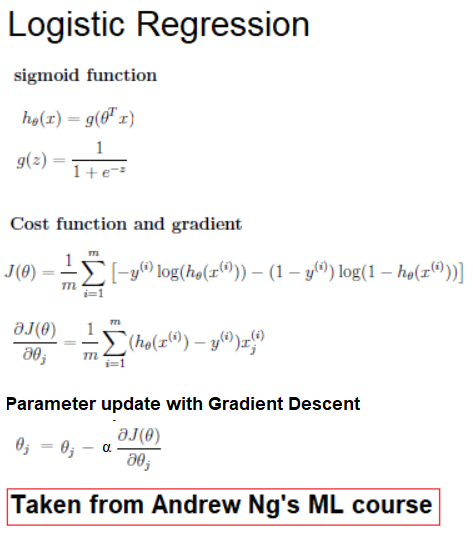

## Sigmoid function

In [2]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

## Binary cross entropy

In [82]:
def cross_entropy_loss(y_pred, y_true):
    y_pred = np.clip(y_pred, 1e-11, 1 - 1e-15)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss


## Logistic regression training


In [135]:
class LogisticRegression():

    def __init__(self, lr=0.00001, n_iters=10000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.costs = []
        self.costs_per_100iter = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            cost = cross_entropy_loss(predictions, y)
            self.costs.append(cost)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

            if i % 100 == 0:
                print(f"Iteration {i}, Cost: {cost}")
                self.costs_per_100iter.append(cost)

        # Plot the cost function over iterations
        plt.plot(range(100), self.costs_per_100iter,  marker='o', markersize=4, linestyle='-')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost Function Over Training')
        plt.show()





    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred




## Testing

In [87]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [136]:
df = datasets.load_breast_cancer()
X, y = df.data, df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

Iteration 0, Cost: 0.6931471805599453
Iteration 100, Cost: 0.49088796051080263
Iteration 200, Cost: 0.36692683764160605
Iteration 300, Cost: 0.33605773197035405
Iteration 400, Cost: 0.3142828444371607
Iteration 500, Cost: 0.29836418134876014
Iteration 600, Cost: 0.2863286706822014
Iteration 700, Cost: 0.2769090845418978
Iteration 800, Cost: 0.2693134103534734
Iteration 900, Cost: 0.263039680229058
Iteration 1000, Cost: 0.25775753200340495
Iteration 1100, Cost: 0.25324080248074543
Iteration 1200, Cost: 0.2493291870628234
Iteration 1300, Cost: 0.24590563377076727
Iteration 1400, Cost: 0.24288246031724484
Iteration 1500, Cost: 0.24019250891197322
Iteration 1600, Cost: 0.2377833298942273
Iteration 1700, Cost: 0.23561325164771765
Iteration 1800, Cost: 0.23364866100299148
Iteration 1900, Cost: 0.23186208065525601
Iteration 2000, Cost: 0.2302307832664599
Iteration 2100, Cost: 0.22873577428624986
Iteration 2200, Cost: 0.22736103279536082
Iteration 2300, Cost: 0.2260929360262902
Iteration 2400,

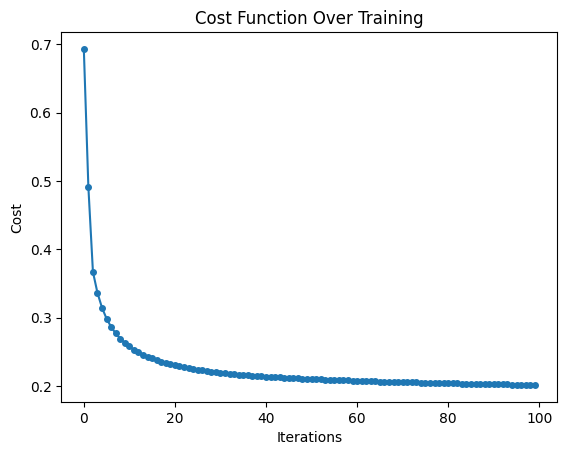

In [138]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [133]:
def accuracy(y_pred,y_test):
  return  np.sum(y_pred==y_test)/len(y_test)

In [139]:
acc = accuracy(y_pred,y_test)
acc

0.9210526315789473